In [1]:
import numpy as np
import numpy.linalg as la
import numpy.random as rand
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import itertools
from mpl_toolkits.mplot3d import Axes3D
import math
from matplotlib import cm
from scipy.integrate import odeint
from scipy import stats
from EDMtoolkit import *
from modelSystems import *
import datetime

plt.rcParams['text.usetex'] = True

%load_ext autoreload
%autoreload 2
%matplotlib notebook

In [111]:
def generateLinearSeries(length=200,b=0.1,p=3):
    eigenvalues = np.exp(rand.random(p)*1j)
    
    # generate column vector basis of R^p, ensure non singular
    V = rand.random((p,p))
    while abs(la.det(V)) < 0.01:
        V = rand.random((p,p))
        
    # generate our linear model
    A = V @ np.identity(p) * eigenvalues @ la.inv(V)
    
    X = np.zeros((200,p),dtype=complex)
    X[0] = rand.normal(p)

    for i in range(200-1):
        X[i+1] = (A @ X[i]) + rand.normal(0,b,p)
        
    return X

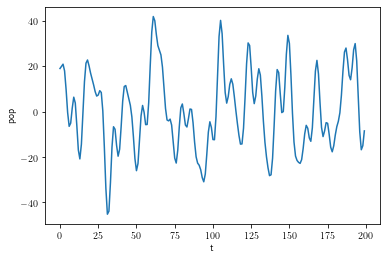

In [124]:
plotTS(generateLinearSeries(b=0,p=20)[:,0])

In [333]:
def rand_disc(n, minimum=0,maximum=1):
    return np.sign(rand.uniform(-1,1,size=n))*rand.uniform(minimum,maximum,size=n)
    # return np.exp(rand.uniform(size=n)*np.pi*2j)
    # return rand.uniform(minimum,maximum,size=n)*np.exp(rand.uniform(size=n)*np.pi*2j)

def calculate_coeff(roots):
    
    # contains the phi which satisfies (1-phi*z)=0 when z=root
    coefs_root_form = -1 / roots
    subset_sizes = range(1,len(coefs_root_form)+1)
    
    # sum all 1 element subsets, then 2 element subsets, ... n element subsets
    return np.array([np.sum(np.prod(np.array(list(itertools.combinations(coefs_root_form, subset_size))),axis=1)) for subset_size in subset_sizes])

    """
    for subset_size in range(1,len(roots)):
        subsets = np.array(list(itertools.combinations(coefs_root_form, subset_size)))
        products = np.sum(np.prod()
        print(subsets)
      
    return
    """
    
def eval_poly(coefs, value):
    return 1 + np.sum(coefs * (value ** np.arange(1,len(coefs)+1)))

In [336]:
np.set_printoptions(suppress=True, precision=3)

roots = rand_disc(10,2,3)
coefs = calculate_coeff(roots)

print(np.array(list([eval_poly(coefs,root) for root in roots])))

[-0.  0. -0.  0. -0.  0. -0. -0. -0. -0.]


In [254]:


calculate_coeff(np.arange(1,5))

array([-2.083,  1.458, -0.417,  0.042])

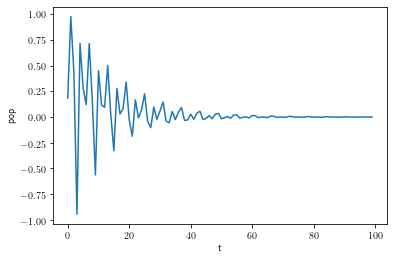

array([ 3.957, -3.53 ,  3.384,  3.363, -3.85 ,  3.224])

In [385]:
tlen = 100
X = rand_disc(tlen)
l = 6

ar_roots = rand_disc(l,np.pi,4)
ar_coeffs = -calculate_coeff(ar_roots)

for i in range(tlen-l):
    X[i+l] = np.sum(ar_coeffs * X[i:i+l])
    
plotTS(X)
ar_roots

# Mockup of delta vs theta graph

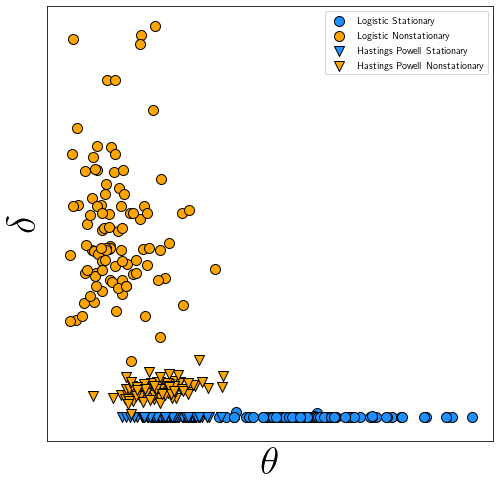

In [431]:
# we assume T=200, obs=0.2, no process noise.

size = 100

dvt_fig, dvt_ax = plt.subplots(1, figsize=(8,8))
dvt_ax.set_xlabel(r"$\theta$",fontsize=40)
dvt_ax.set_ylabel(r"$\delta$",fontsize=40)
dvt_ax.set_xticks([])
dvt_ax.set_yticks([])

# fill with data of results for Hastings Powell and Logistic in Round 2
l_data = np.loadtxt("logistic_obsnoise_vs_NS_Rate.csv",delimiter=',')
hp_data = np.loadtxt("hastings_powell_obsnoise_vs_NS_Rate.csv",delimiter=',')

l_data[:,0] == 0.1

# Stationary = Blue, Nonstationary = Red
dvt_ax.scatter(l_stat[:,1], l_stat[:,0], c="dodgerblue", s=size, edgecolors="black", label="Logistic Stationary")
dvt_ax.scatter(l_nonstat[:,1], l_nonstat[:,0], c="orange", s=size, edgecolors="black", label="Logistic Nonstationary")
dvt_ax.scatter(hp_stat[:,1], hp_stat[:,0], c="dodgerblue",marker="v", s=size, edgecolors="black", label="Hastings Powell Stationary")
dvt_ax.scatter(hp_nonstat[:,1], hp_nonstat[:,0], c="orange",marker="v", s=size, edgecolors="black", label="Hastings Powell Nonstationary")

plt.legend()
plt.show()

In [412]:
l_nonstat = l_data[np.logical_and(l_data[:,0] == 0.1,l_data[:,1] == 2)][:,2:4]
l_stat = l_data[np.logical_and(l_data[:,0] == 0.1,l_data[:,1] == 0)][:,2:4]
hp_nonstat = hp_data[np.logical_and(hp_data[:,0] == 0.1,hp_data[:,1] == 2)][:,2:4]
hp_stat = hp_data[np.logical_and(hp_data[:,0] == 0.1,hp_data[:,1] == 0)][:,2:4]

In [410]:
hp_nonstat

array([[4.196, 3.022],
       [2.152, 2.962],
       [2.899, 2.999],
       [3.719, 3.344],
       [2.268, 3.163],
       [3.162, 2.848],
       [2.928, 3.273],
       [3.406, 3.457],
       [2.554, 2.991],
       [3.588, 3.146],
       [6.744, 3.378],
       [4.104, 3.201],
       [2.579, 2.828],
       [2.518, 3.047],
       [1.927, 2.77 ],
       [3.731, 3.088],
       [2.241, 3.02 ],
       [4.028, 3.195],
       [2.514, 2.998],
       [2.993, 2.841],
       [3.19 , 2.837],
       [2.204, 3.132],
       [2.56 , 2.667],
       [4.218, 3.142],
       [4.977, 3.181],
       [3.948, 3.101],
       [2.241, 2.934],
       [3.039, 2.876],
       [2.289, 3.022],
       [4.016, 3.083],
       [2.833, 3.091],
       [2.84 , 2.967],
       [3.023, 3.154],
       [4.176, 2.993],
       [3.023, 2.953],
       [3.099, 3.113],
       [3.241, 3.044],
       [3.729, 3.103],
       [4.05 , 2.942],
       [2.567, 2.719],
       [2.269, 2.853],
       [3.728, 3.119],
       [3.432, 3.058],
       [2.1